# 전국 신규 민간아파트 분양가격 동향
    https://www.data.go.kr/

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


In [2]:
pre_sale = pd.read_csv("data/apt/2018_7.csv", encoding='euc-kr')
pre_sale.head()
pre_sale.shape
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2750 non-null object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB


In [3]:
# 결측지 정보
pre_sale.isnull().sum()


import missingno as msno
msno.matrix(pre_sale, figsize=(10, 3))

In [4]:
pre_sale.info()

pre_sale["분양가격(㎡)"] = pd.to_numeric(pre_sale["분양가격(㎡)"], errors="coerce")
pre_sale.info()
pre_sale["평당분양가격"] = pre_sale["분양가격(㎡)"]*3.3
pre_sale.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2750 non-null object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2658 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 113.0+ KB


,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7


In [5]:
pre_sale.isnull().sum()
pre_sale.describe()

,연도,월,분양가격(㎡),평당분양가격
count,2890.000000,2890.000000,2658.000000,2658.000000
mean,2016.676471,6.382353,3063.297216,10108.880813
std,0.898539,3.515406,1112.743769,3672.054436
min,2015.000000,1.000000,1868.000000,6164.400000
25%,2016.000000,3.000000,2348.000000,7748.400000
50%,2017.000000,6.000000,2743.000000,9051.900000
75%,2017.000000,10.000000,3293.750000,10869.375000
max,2018.000000,12.000000,8098.000000,26723.400000


In [6]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7


In [7]:
# 2017년도 데이터 조회
pre_sale_2017 = pre_sale.loc[pre_sale["연도"]==2017]
pre_sale_2017
pre_sale_2017.shape

(1020, 6)

In [8]:
# 카테고리별 갯수 확인
print(pre_sale["규모구분"].value_counts())
print(pre_sale["지역명"].value_counts())

전용면적 85㎡초과 102㎡이하    578
전용면적 102㎡초과          578
전용면적 60㎡초과 85㎡이하     578
전용면적 60㎡이하           578
전체                   578
Name: 규모구분, dtype: int64
대구    170
전북    170
울산    170
제주    170
충북    170
대전    170
부산    170
전남    170
강원    170
인천    170
세종    170
광주    170
충남    170
경북    170
서울    170
경남    170
경기    170
Name: 지역명, dtype: int64


In [9]:
# 전국 평균분양 가격
pre_sale.groupby(pre_sale.연도).describe().T

연도                     2015          2016          2017          2018
분양가격(㎡) count    243.000000    984.000000    899.000000    532.000000
        mean    2788.707819   2934.250000   3139.541713   3298.567669
        std      976.861182   1071.441561   1107.584870   1195.955014
        min     1868.000000   1900.000000   1976.000000   2076.000000
        25%     2225.000000   2282.000000   2365.000000   2471.000000
        50%     2516.000000   2672.000000   2849.000000   2914.000000
        75%     3025.500000   3148.500000   3456.000000   3647.250000
        max     7092.000000   8096.000000   7887.000000   8098.000000
월       count    255.000000   1020.000000   1020.000000    595.000000
        mean      11.000000      6.500000      6.500000      4.000000
        std        0.818102      3.453746      3.453746      2.001683
        min       10.000000      1.000000      1.000000      1.000000
        25%       10.000000      3.750000      3.750000      2.000000
        50%       11.000000      6.500000      6.500000      4.000000
        75%       12.000000      9.250000      9.250000      6.000000
        max       12.000000     12.000000     12.000000      7.000000
평당분양가격  count    243.000000    984.000000    899.000000    532.000000
        mean    9202.735802   9683.025000  10360.487653  10885.273308
        std     3223.641902   3535.757150   3655.030071   3946.651548
        min     6164.400000   6270.000000   6520.800000   6850.800000
        25%     7342.500000   7530.600000   7804.500000   8154.300000
        50%     8302.800000   8817.600000   9401.700000   9616.200000
        75%     9984.150000  10390.050000  11404.800000  12035.925000
        max    23403.600000  26716.800000  26027.100000  26723.400000

In [10]:
pre_sale.pivot_table("평당분양가격", "규모구분", "연도")

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,9837.226667,10388.728272,11334.484615,11235.314563
전용면적 60㎡이하,8951.525000,9398.876119,10246.133333,10911.633333
전용면적 60㎡초과 85㎡이하,8891.817647,9295.986765,9825.000000,10463.662185
전용면적 85㎡초과 102㎡이하,9518.506250,10122.355435,10540.402454,11483.085542
전체,8893.047059,9293.042647,9901.270588,10563.022689


In [11]:
pd.options.display.float_format = '{:,.0f}'.format

# 전국 분양가 변동 금액
region_year_all = pre_sale.loc[pre_sale["규모구분"]=="전체"]
region_year_all.head()




,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,"5,841","19,275"
5,인천,전체,2015,10,"3,163","10,438"
10,경기,전체,2015,10,"3,138","10,355"
15,부산,전체,2015,10,"3,112","10,270"
20,대구,전체,2015,10,"2,682","8,851"


In [12]:
region_year = region_year_all.pivot_table("평당분양가격", "지역명", "연도")
region_year

연도,2015,2016,2017,2018
지역명,,,,
강원,"7,160","7,011","7,127","7,641"
경기,"10,377","11,220","11,850","12,881"
경남,"7,586","7,848","8,120","8,894"
경북,"7,171","7,361","7,795","8,342"
광주,"8,052","8,899","9,464","9,638"
대구,"9,232","10,310","11,456","11,737"
대전,"8,098","8,502","9,045","9,604"
부산,"10,307","10,430","11,578","12,756"
서울,"19,725","20,663","21,376","22,329"


In [13]:
region_year = region_year_all.pivot_table("평당분양가격", "지역명", "연도").reset_index()
region_year

region_year["변동액"] = region_year[2018] - region_year[2015]
region_year

연도,지역명,2015,2016,2017,2018,변동액
0,강원,"7,160","7,011","7,127","7,641",481
1,경기,"10,377","11,220","11,850","12,881","2,503"
2,경남,"7,586","7,848","8,120","8,894","1,309"
3,경북,"7,171","7,361","7,795","8,342","1,171"
4,광주,"8,052","8,899","9,464","9,638","1,586"
5,대구,"9,232","10,310","11,456","11,737","2,505"
6,대전,"8,098","8,502","9,045","9,604","1,506"
7,부산,"10,307","10,430","11,578","12,756","2,449"
8,서울,"19,725","20,663","21,376","22,329","2,604"
9,세종,"8,750","8,860","9,135","10,375","1,624"


In [14]:
print("가장 많이 오른 곳은 제주이다. 상승액은 평당 {:,.0f}원이다.".format((np.max(region_year["변동액"])*1000)))
print("가장 적게 내린 곳은 울산이다. 상승액은 평당 {:,.0f}원이다.".format((np.min(region_year["변동액"])*1000)))
print("전국 평균 변동액은 평당 {:,.0f}원이다.".format((np.mean(region_year["변동액"])*1000)))

가장 많이 오른 곳은 제주이다. 상승액은 평당 5,087,186원이다.
가장 적게 내린 곳은 울산이다. 상승액은 평당 369,443원이다.
전국 평균 변동액은 평당 1,669,976원이다.


In [15]:
#!pip install plotnine
from plotnine import *




In [16]:
pre_sale["연도"] = pre_sale["연도"].astype(str)
pre_sale["월"] = pre_sale["월"].astype(str)

C:\Users\User\Anaconda3\lib\site-packages\plotnine\layer.py:430: UserWarning: position_stack : Removed 17 rows containing missing values.
  data = self.position.setup_data(self.data, params)


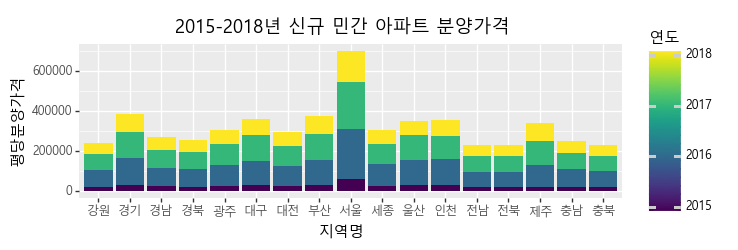

<ggplot: (154518432979)>

In [17]:
# 지역별 평당분양가격
ggplot(region_year_all, aes(x="지역명", y="평당분양가격", fill="연도")) + geom_bar(stat='identity') + \
theme(text=element_text(family=font_name), figure_size=(7, 2)) + ggtitle("2015-2018년 신규 민간 아파트 분양가격")

C:\Users\User\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 232 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\User\Anaconda3\lib\site-packages\plotnine\stats\stat.py:310: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


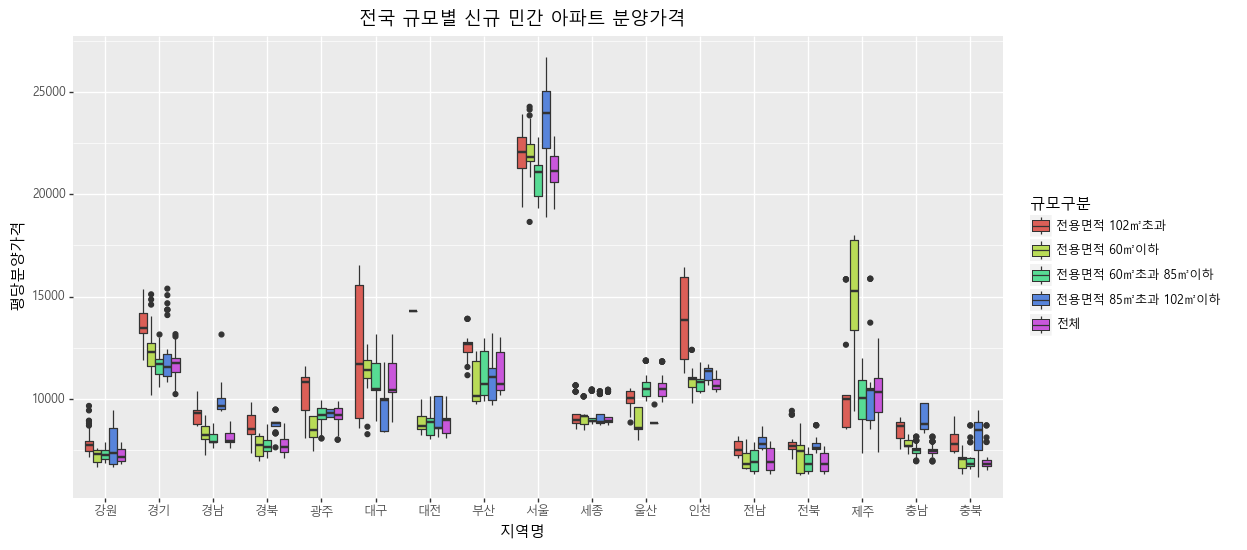

<ggplot: (-9223371882336229856)>

In [19]:
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_boxplot()
 + ggtitle('전국 규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family=font_name),
         figure_size=(12, 6))
)

C:\Users\User\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 5 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


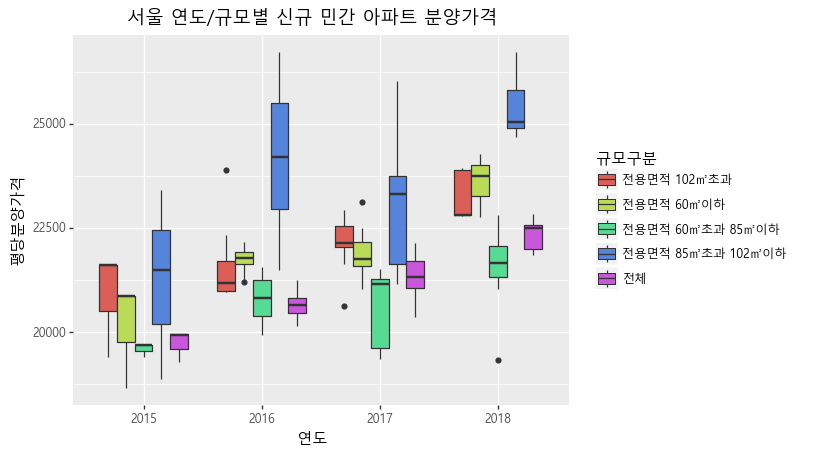

<ggplot: (-9223371905424616511)>

In [132]:
pre_sale_seoul = pre_sale.loc[pre_sale['지역명']=='서울']
(ggplot(pre_sale_seoul)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + ggtitle('서울 연도/규모별 신규 민간 아파트 분양가격')
 + geom_boxplot()
 + theme(text=element_text(family=font_name))
)

## 2015년 이전 데이터 전처리

In [20]:
df = pd.read_csv('data/apt/2014_2015.csv', encoding='euc-kr', skiprows=1, header=0)
df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477


In [21]:
df.shape

(23, 27)

In [22]:
year = df.iloc[0]
year

month = df.iloc[1]
month

Unnamed: 0        시도
Unnamed: 1       시군구
Unnamed: 2       12월
Unnamed: 3        1월
Unnamed: 4        2월
Unnamed: 5        3월
Unnamed: 6        4월
Unnamed: 7        5월
Unnamed: 8        6월
Unnamed: 9        7월
Unnamed: 10       8월
Unnamed: 11       9월
Unnamed: 12      10월
Unnamed: 13      11월
Unnamed: 14      12월
Unnamed: 15       1월
Unnamed: 16       2월
Unnamed: 17       3월
Unnamed: 18       4월
Unnamed: 19       5월
Unnamed: 20       6월
Unnamed: 21       7월
Unnamed: 22       8월
Unnamed: 23       9월
Unnamed: 24      전월비
Unnamed: 25     전년말비
Unnamed: 26    전년동월비
Name: 1, dtype: object

In [23]:
for i, y in  enumerate(year):
    if i>2 and i<15:
        year[i] = ''.join(["2014년", month[i]])
    elif i >= 15:
        year[i] = ''.join(["2015년", month[i]])
    elif i == 2:
        year[i] = ''.join([year[i], month[i]])
    elif i == 1:
        year[i] = '시군구'
        
year

Unnamed: 0             구분
Unnamed: 1            시군구
Unnamed: 2       2013년12월
Unnamed: 3        2014년1월
Unnamed: 4        2014년2월
Unnamed: 5        2014년3월
Unnamed: 6        2014년4월
Unnamed: 7        2014년5월
Unnamed: 8        2014년6월
Unnamed: 9        2014년7월
Unnamed: 10       2014년8월
Unnamed: 11       2014년9월
Unnamed: 12      2014년10월
Unnamed: 13      2014년11월
Unnamed: 14      2014년12월
Unnamed: 15       2015년1월
Unnamed: 16       2015년2월
Unnamed: 17       2015년3월
Unnamed: 18       2015년4월
Unnamed: 19       2015년5월
Unnamed: 20       2015년6월
Unnamed: 21       2015년7월
Unnamed: 22       2015년8월
Unnamed: 23       2015년9월
Unnamed: 24      2015년전월비
Unnamed: 25     2015년전년말비
Unnamed: 26    2015년전년동월비
Name: 0, dtype: object

In [25]:
df.columns = year
df
df = df.drop(df.index[[0, 1]])

In [26]:
df

df["구분"] = df["구분"].fillna("")
df["시군구"] = df["시군구"].fillna("")

df

,구분,시군구,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,...,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월,2015년9월,2015년전월비,2015년전년말비,2015년전년동월비
2,전국,,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
10,,,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
11,경기,,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [27]:
df["지역"] = df["구분"] + df["시군구"]

In [28]:
df["지역"]

2          전국
3          서울
4     6대광역시부산
5          대구
6          인천
7          광주
8          대전
9          울산
10           
11         경기
12        수도권
13         세종
14       지방강원
15         충북
16         충남
17         전북
18         전남
19         경북
20         경남
21         제주
22           
Name: 지역, dtype: object

In [29]:
melt_columns = df.columns.copy()
melt_columns

Index(['구분', '시군구', '2013년12월', '2014년1월', '2014년2월', '2014년3월', '2014년4월',
       '2014년5월', '2014년6월', '2014년7월', '2014년8월', '2014년9월', '2014년10월',
       '2014년11월', '2014년12월', '2015년1월', '2015년2월', '2015년3월', '2015년4월',
       '2015년5월', '2015년6월', '2015년7월', '2015년8월', '2015년9월', '2015년전월비',
       '2015년전년말비', '2015년전년동월비', '지역'],
      dtype='object', name=0)

In [34]:
df_2013_2015 = pd.melt(df, id_vars=['지역'], value_vars=['2013년12월', '2014년1월', '2014년2월', '2014년3월', '2014년4월',
       '2014년5월', '2014년6월', '2014년7월', '2014년8월', '2014년9월', '2014년10월',
       '2014년11월', '2014년12월', '2015년1월', '2015년2월', '2015년3월', '2015년4월',
       '2015년5월', '2015년6월', '2015년7월', '2015년8월', '2015년9월'])
df_2013_2015.head()

,지역,0,value
0,전국,2013년12월,"8,059"
1,서울,2013년12월,"18,189"
2,6대광역시부산,2013년12월,"8,111"
3,대구,2013년12월,"8,080"
4,인천,2013년12월,"10,204"


In [35]:
df_2013_2015.columns = ['지역', '기간', '분양가']
df_2013_2015.head()

,지역,기간,분양가
0,전국,2013년12월,"8,059"
1,서울,2013년12월,"18,189"
2,6대광역시부산,2013년12월,"8,111"
3,대구,2013년12월,"8,080"
4,인천,2013년12월,"10,204"


In [65]:
df_2013_2015['연도'] = df_2013_2015['기간'].apply(lambda year_month : year_month.split('년')[0])
df_2013_2015['연도']
df_2013_2015.head()

df_2013_2015['월'] = df_2013_2015["기간"].apply(lambda year_month:year_month.split("년")[1].replace('월',''))
df_2013_2015['월']

df_2013_2015.head()

,지역,기간,분양가,연도,월
0,전국,2013년12월,8059,2013,12
1,서울,2013년12월,18189,2013,12
2,부산,2013년12월,8111,2013,12
3,대구,2013년12월,8080,2013,12
4,인천,2013년12월,10204,2013,12


In [42]:
df_2013_2015["지역"].value_counts()

df_2013_2015["지역"] = df_2013_2015["지역"].apply(lambda x: x.replace('6대광역시부산', '부산'))
df_2013_2015["지역"] = df_2013_2015["지역"].apply(lambda x: x.replace('지방강원', '강원'))

df_2013_2015["지역"].value_counts()

       44
충남     22
부산     22
울산     22
전국     22
경북     22
세종     22
제주     22
수도권    22
충북     22
경남     22
전북     22
인천     22
대전     22
대구     22
서울     22
경기     22
강원     22
광주     22
전남     22
Name: 지역, dtype: int64

In [44]:
df_2013_2015.info()

df_2013_2015['분양가'] = df_2013_2015['분양가'].str.replace(',','').astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 5 columns):
지역     462 non-null object
기간     462 non-null object
분양가    462 non-null object
연도     462 non-null object
월      462 non-null object
dtypes: object(5)
memory usage: 18.1+ KB


In [45]:
df_2013_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 5 columns):
지역     462 non-null object
기간     462 non-null object
분양가    462 non-null int32
연도     462 non-null object
월      462 non-null object
dtypes: int32(1), object(4)
memory usage: 16.3+ KB


C:\Users\User\Anaconda3\lib\site-packages\plotnine\stats\stat.py:310: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


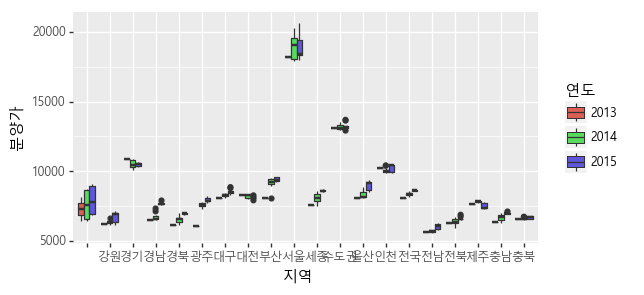

<ggplot: (-9223371882334244597)>

In [48]:

(ggplot(df_2013_2015, aes(x='지역', y='분양가', fill='연도'))
 + geom_boxplot()
 + theme(text=element_text(family=font_name),
         figure_size=(6, 3))
)

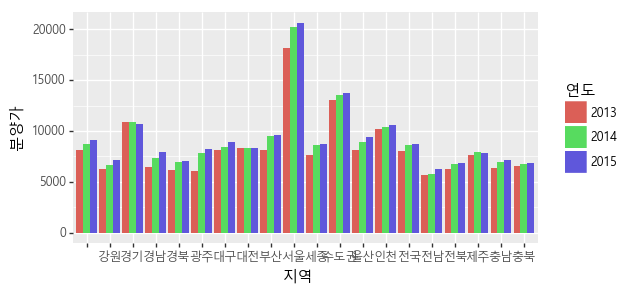

<ggplot: (-9223371882336062229)>

In [50]:
(ggplot(df_2013_2015, aes(x='지역', y='분양가', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family=font_name),
         figure_size=(6, 3))
)

# 두 데이터 프레임의 결합

In [51]:
df_2015_2018 = pre_sale.loc[pre_sale['규모구분'] == '전체']
print(df_2015_2018.shape)
df_2015_2018.head()

(578, 6)


,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,"5,841","19,275"
5,인천,전체,2015,10,"3,163","10,438"
10,경기,전체,2015,10,"3,138","10,355"
15,부산,전체,2015,10,"3,112","10,270"
20,대구,전체,2015,10,"2,682","8,851"


In [52]:
print(df_2013_2015.columns)
print(df_2015_2018.columns)


Index(['지역', '기간', '분양가', '연도', '월'], dtype='object')
Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '평당분양가격'], dtype='object')


In [55]:
df_2013_2015_prepare = df_2013_2015[["지역", "연도", "월", "분양가"]]
df_2013_2015_prepare.head()

,지역,연도,월,분양가
0,전국,2013,12,8059
1,서울,2013,12,18189
2,부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204


In [56]:
df_2015_2018_prepare = df_2015_2018[["지역명", "연도", "월", "평당분양가격"]]
df_2015_2018_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,"19,275"
5,인천,2015,10,"10,438"
10,경기,2015,10,"10,355"
15,부산,2015,10,"10,270"
20,대구,2015,10,"8,851"


In [58]:
df_2013_2015_prepare.columns = ['지역명', '연도', '월', '평당분양가격']
df_2013_2015_prepare.head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,8059
1,서울,2013,12,18189
2,부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204


In [59]:
# 두 테이블의 병합
df_2013_2018 = pd.concat([df_2013_2015_prepare, df_2015_2018_prepare])
df_2013_2018.shape

(1040, 4)

In [63]:
df_2013_2018.head()
df_2013_2018.tail()

df_2013_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 2885
Data columns (total 4 columns):
지역명       1040 non-null object
연도        1040 non-null object
월         1040 non-null object
평당분양가격    1023 non-null float64
dtypes: float64(1), object(3)
memory usage: 40.6+ KB


In [66]:
df_2013_2015_region = df_2013_2015_prepare["지역명"].unique()
df_2013_2015_region

array(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '', '경기', '수도권',
       '세종', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [69]:
df_2015_2018_region = df_2015_2018_prepare["지역명"].unique()
df_2015_2018_region

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [70]:
exclude_region = [region for region in df_2013_2015_region if not region in df_2015_2018_region]
exclude_region

['전국', '', '수도권']

In [72]:
df_2013_2018.loc[df_2013_2018["지역명"].str.match("전국|수도권")].head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
10,수도권,2013,12,"13,083"
21,전국,2014,1,"8,130"
31,수도권,2014,1,"12,995"
42,전국,2014,2,"8,195"


In [73]:
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'].str.match("전국|수도권")].index, axis=0, inplace=True)

In [74]:
df_2013_2018.shape

(986, 4)

In [75]:
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018["지역명"]==''].index, axis=0, inplace=True)

In [76]:
df_2013_2018.shape

(933, 4)

C:\Users\User\Anaconda3\lib\site-packages\plotnine\layer.py:430: UserWarning: position_stack : Removed 17 rows containing missing values.
  data = self.position.setup_data(self.data, params)


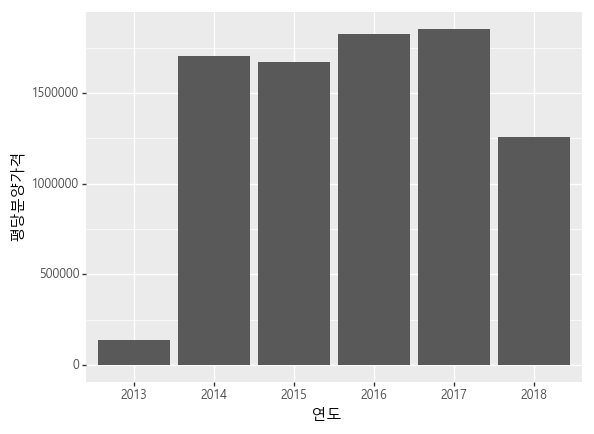

<ggplot: (-9223371882333914585)>

In [77]:
(ggplot(df_2013_2018, aes(x='연도', y='평당분양가격'))
    + geom_bar(stat='identity') + theme(text=element_text(family=font_name)))

C:\Users\User\Anaconda3\lib\site-packages\plotnine\layer.py:430: UserWarning: position_stack : Removed 17 rows containing missing values.
  data = self.position.setup_data(self.data, params)


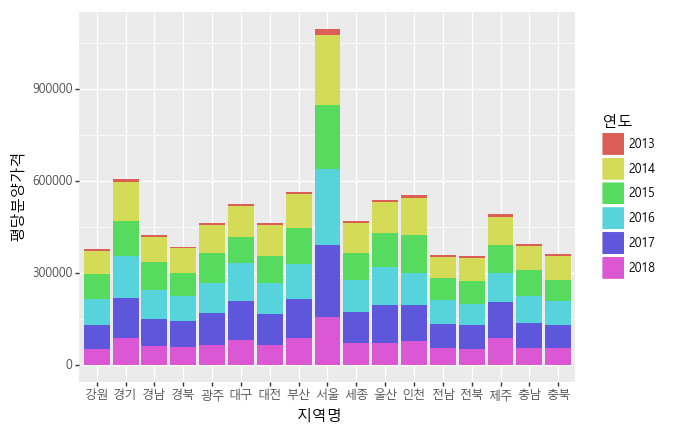

<ggplot: (-9223371882333533920)>

In [78]:
(ggplot(df_2013_2018, aes(x='지역명', y='평당분양가격', fill='연도'))
    + geom_bar(stat='identity') + theme(text=element_text(family=font_name)))